<center> <h1> <b> Speech Systems (EE6307) </b> </h1> </center>


<dt> <h4>
 <b> Programming Assignment - 06 - Isolated digit recognition using Dynamic Time Warping (DTW) algorithm </b> 

Welcome to the six programming assignment in the speech systems (EE6307) course. We expect you to code the dynamic time warping (DTW) algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation. 

</h4> </dt> 




<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.





<h4> <b> Dynamic Time Warping (DTW) algorithm : </b>  In this part of the assignment, you need to code the DTW algorithm from scratch.   </h4> 


[link to TDIGITS database](https://drive.google.com/drive/folders/1SUD1YO4ATFZP_RaWuLO_e8swWkG-YZ-G?usp=sharing)


<dt> <h4> 1. Dynamic Time Warping (DTW) algorithm </h4> </dt> 
<dd> <h4> - Let us consider two templates  </h4> </dd> 
<dd> <h4> - Compute the distance matrix between the two templates  </h4> </dd> 
<dd> <h4> - Compute the accumulative distance matrix   </h4> </dd>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance      </h4> </dd>
<dd> <h4> - Plot the optimal path on both distance and cumulative distance matrix to verify the DTW codes  </h4> </dd>






In [ ]:
#################################
#Import all the modules
#################################
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
!pip install speechpy
!pip install python_speech_features

import scipy.io.wavfile
import io
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


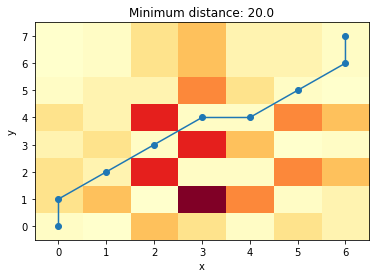

In [ ]:
#################################
#Function to obtain the optimal distance and path between two templates
#################################
def DTW(template1,template2): 
    #################################
    # Input  : Two templates 
    # Output : DTW path and optimal distance 
    #################################
    distance_matrix = np.zeros((len(template1), len(template2)))

    for i in range(len(template1)):
      for j in range((len(template2))):
        x = template1[i] - template2[j]
        distance_matrix[i, j] = np.linalg.norm(x)**2

    #################################
    #Code snippet to create the cumulative distance matrix
    #################################
    #Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((len(template1) + 1, len(template2) + 1)) # cummulative distance matrix
    DTW_cumulate_Matrix[0,1:] = np.inf
    DTW_cumulate_Matrix[1:,0] = np.inf 

    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(1,len(template1) + 1 ,1): #you can start from 1 
        for j in range(1,len(template2) + 1,1):
            current_distance = distance_matrix[i-1, j-1] # Compute the euclidean distance between the current feature vectors

            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
            DTW_cumulate_Matrix[i,j] = current_distance + min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])

    #################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #################################

    DTW_cumulate_Matrix = DTW_cumulate_Matrix[1:,1:]
    opt_distance = DTW_cumulate_Matrix[-1, -1]


    i =  len(template1) -1 # length of the template1
    j =  len(template2) -1 # length of the template2

    p, q = [i], [j]

    while ((i > 0) or (j > 0)): #Start from the last point and backtrack

        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])

        tb = np.argmin((DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1]))
        if (tb == 0):
            i -= 1
        elif (tb == 1):
            i -= 1
            j -= 1
        else:
            j -= 1
        p.insert(0, i)
        q.insert(0, j)

    # Store the required indexes to obtain the optimal path 
    optimal_path = (np.array(p), np.array(q))

    #################################
    # Return optimal distance and optimal dtw path
    #################################
    return DTW_cumulate_Matrix, distance_matrix, optimal_path, opt_distance


def plotDTWpath(template1,template2):
    #################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix 
    #################################

    cd, distance_matrix, path, dist = DTW(template1, template2)

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.imshow(distance_matrix.T, origin='lower', cmap=plt.cm.YlOrRd, interpolation='nearest')
    plt.plot(path[0], path[1], '-o') # relation
    # plt.xticks(range(len(template1)))
    # plt.yticks(range(len(template2)))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('tight')
    plt.title('Minimum distance: {}'.format(dist))
    plt.show()


x = np.array([4,3,7,0,2,6,5])
y = np.array([3,7,1,6,1,5,4,4])

plotDTWpath(x, y)             

<h4> <b> Part2 : </b>  In this part of the assignment, we expect you to build the isolated digit recognition system with the help of the above written DTW algorithm 



<dt> <h4> 1. Data Preparation </h4> </dt> 

<dd> <h4> - Record one repetition each of digits zero,one,two,three,four,five,six,seven,eight and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </h4> </dd> 

<dd> <h4> - Record three further repetitions of the same digits (isolated words) as test data.  </h4> </dd> 

<dt> <h4> 2. Template Extraction </h4> </dt> 
<dd> <h4> - Extract 30-dimensional Mel Frequency Cepstral Coefficients (MFCCs) from the speech signal. Add delta (velocity) and delta-delta (acceleration) coefficients to include the formant dynamics in the features. Use the following parameters for extracting the features. Framesize = 25 msec, Frameshift = 10 msec and number of mel filter banks = 40  </h4> </dd> 
<dd> <h4> - Process the features using cepstral mean-variance normalization (CMVN) to remove the convolutive noise. Use the optimal window in CMVN preprocessing. Typically it is preferred to use 3 seconds.   </h4> </dd> 
<dd> <h4> - Voice Activity Detector (VAD): Silence regions in the speech signal will not contain speaker information, and including them in GMM modeling will deteriorate the performance. Hence, remove the silence/noise frames using an energy-based voice activity detector module  </h4> </dd> 


<dt> <h4> 3. Isolated Digit Recognition using DTW  </h4> </dt> 

<dd> <h4> - Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.  </h4> </dd> 

<dd> <h4> - Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts.   </h4> </dd> 

<dd> <h4> - Create a confusion matrix and report the most confusing digits.   </h4> </dd> 

<dt> <h4> 4. Evaluate the performance on different test cases  </h4> </dt> 

<dd> <h4> -  Evaluate the performance of digit recognition systems on the TDGIT database and report the accuracy.   </h4> </dd> 
<dd> <h4> -  Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker.    </h4> </dd> 
<dd> <h4> -  Please report some of the changes to improve the system performance.   </h4> </dd> 

[link to TDIGITS database](https://drive.google.com/drive/folders/1SUD1YO4ATFZP_RaWuLO_e8swWkG-YZ-G?usp=sharing)


<h4> <b> Modules to record the speech signals  </b>  

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
import os

os.chdir("../")
os.mkdir("test_audio_dataset")
os.chdir("test_audio_dataset")

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration. 
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('nine_1.wav', 16000, fp_arr) #Please change the name.

In [ ]:
!zip -r /content/test.zip /content/test_audio_dataset

In [ ]:
#################################
#Data Preparation ( You may use the online voice recorder modules provided at the end of the colab file)
#################################

!unzip mydata

Archive:  mydata.zip
   creating: test/
  inflating: test/two_3.wav          
  inflating: test/five_3.wav         
  inflating: test/four_3.wav         
  inflating: test/seven_3.wav        
  inflating: test/three_2.wav        
  inflating: test/three_3.wav        
  inflating: test/zero_1.wav         
  inflating: test/two_2.wav          
  inflating: test/four_1.wav         
  inflating: test/nine_1.wav         
  inflating: test/one_2.wav          
  inflating: test/eight_2.wav        
  inflating: test/two_1.wav          
  inflating: test/one_3.wav          
  inflating: test/three_1.wav        
  inflating: test/nine_3.wav         
  inflating: test/one_1.wav          
  inflating: test/six_1.wav          
  inflating: test/eight_1.wav        
  inflating: test/five_2.wav         
  inflating: test/nine_2.wav         
  inflating: test/seven_2.wav        
  inflating: test/six_3.wav          
  inflating: test/four_2.wav         
  inflating: test/seven_1.wav        
  inflatin

In [ ]:
#################################
#Template Extraction
#################################

import speechpy
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import librosa

def MFCC(wavfile):
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=7600,winfunc=np.hamming)
  mfcc_delta = librosa.feature.delta(mfcc_feat)
  mfcc_delta2 = librosa.feature.delta(mfcc_feat, order=2)
  mfcc_feat = np.vstack([mfcc_feat, mfcc_delta, mfcc_delta2])
  mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)
  return mfcc_feat_cmvn

#################################
#Isolated digita recognition using DTW Algorithm
#################################

def algorithm(template):

  distances = np.array([])
  directory = 'train'

  x = os.listdir(directory)
  wave_dict = {'eight.wav' : 8, 'five.wav' : 5, 'four.wav' : 4, 'nine.wav' : 9, 'one.wav' : 1, 'seven.wav' : 7, 'six.wav' : 6, 'three.wav' : 3, 'two.wav' : 2, 'zero.wav' : 0}

  # sorting files
  files = np.array([])
  file_direc = np.array([])

  for filename in x:
    files = np.append(files, wave_dict[filename])

  files.sort()

  key_list = list(wave_dict.keys())
  val_list = list(wave_dict.values())

  for i in files:
    position = val_list.index(i)
    file_direc = np.append(file_direc, key_list[position])

  # iterate over files in train directory
  for filename in file_direc:
      f = os.path.join(directory, filename)
      # checking if it is a file
      if os.path.isfile(f):
          _, _, _ , dist= DTW(MFCC(f), MFCC(template))
          distances = np.append(distances, dist)
  
  return np.argmin(distances, axis=0)

print(algorithm('test/seven_1.wav'))

7


In [ ]:
#################################
#Evaluate the performance on different test cases
#################################

digit_predictions = np.array([])
directory = 'test'

labels = {"zero_1.wav" : 0, "zero_2.wav" : 0, "zero_3.wav" : 0,
          "one_1.wav" : 1, "one_2.wav" : 1, "one_3.wav" : 1,
          "two_1.wav" : 2, "two_2.wav" : 2, "two_3.wav" : 2,
          "three_1.wav" : 3, "three_2.wav" : 3, "three_3.wav" : 3,
          "four_1.wav" : 4, "four_2.wav" : 4, "four_3.wav" : 4,
          "five_1.wav" : 5, "five_2.wav" : 5, "five_3.wav" : 5,
          "six_1.wav" : 6, "six_2.wav" : 6, "six_3.wav" : 6,
          "seven_1.wav" : 7, "seven_2.wav" : 7, "seven_3.wav" : 7,
          "eight_1.wav" : 8, "eight_2.wav" : 8, "eight_3.wav" : 8,
          "nine_1.wav" : 9, "nine_2.wav" : 9, "nine_3.wav" : 9}

# iterate over files in test directory
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  # checking if it is a file
  if os.path.isfile(f):
    pred = algorithm(f)
    digit_predictions = np.append(digit_predictions, [pred, labels[filename]])
    print("File : " , filename, "| Prediction : ", pred)

File :  eight_3.wav | Prediction :  8
File :  two_2.wav | Prediction :  2
File :  two_3.wav | Prediction :  1
File :  seven_3.wav | Prediction :  7
File :  eight_2.wav | Prediction :  8
File :  three_2.wav | Prediction :  3
File :  two_1.wav | Prediction :  2
File :  three_1.wav | Prediction :  3
File :  four_1.wav | Prediction :  4
File :  six_2.wav | Prediction :  6
File :  one_1.wav | Prediction :  1
File :  seven_2.wav | Prediction :  7
File :  one_2.wav | Prediction :  1
File :  seven_1.wav | Prediction :  7
File :  nine_1.wav | Prediction :  9
File :  five_3.wav | Prediction :  9
File :  zero_3.wav | Prediction :  0
File :  six_1.wav | Prediction :  6
File :  six_3.wav | Prediction :  6
File :  zero_2.wav | Prediction :  0
File :  four_2.wav | Prediction :  4
File :  nine_2.wav | Prediction :  9
File :  three_3.wav | Prediction :  3
File :  four_3.wav | Prediction :  4
File :  one_3.wav | Prediction :  1
File :  five_1.wav | Prediction :  9
File :  nine_3.wav | Prediction :  9
Fi

DTW Accuracy : 0.8666666666666667


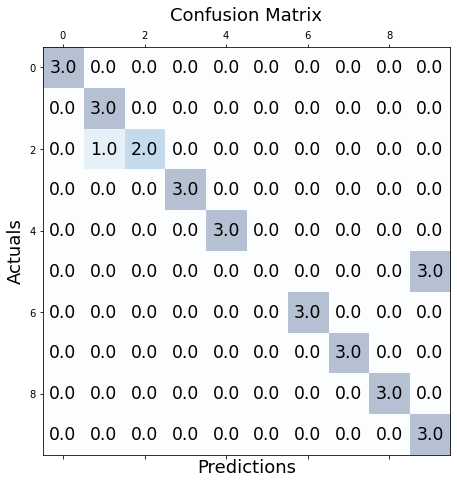

In [ ]:
pred = digit_predictions[0::2].astype('int')
true = digit_predictions[1::2].astype('int')

correct = np.sum(pred == true)
accuracy = correct/len(true)

print("DTW Accuracy :", accuracy)

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Experiments on TDIGITS Data

In [ ]:
## Example code to load wavefiles from drive
from google.colab import drive
import os
import soundfile as sf

#!unzip train2

drive.mount('/content/drive')

train_data_location = '/content/drive/My Drive/MultiSpeakerDigitData_modified/train/'
train_data_files = []
for root, dirs, files in os.walk(train_data_location):
    for file in files:
        if file.endswith(".wav"):
             train_data_files.append(os.path.join(root, file))
train_data_files = np.array(train_data_files)

bacground_data_location='/content/drive/My Drive/MultiSpeakerDigitData_modified/jackson/' #Change this location
jackson_bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             jackson_bacground_data_files.append(os.path.join(root, file))
jackson_bacground_data_files = np.array(jackson_bacground_data_files)

bacground_data_location='/content/drive/My Drive/MultiSpeakerDigitData_modified/nicolas/' #Change this location
nicolas_bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             nicolas_bacground_data_files.append(os.path.join(root, file))
nicolas_bacground_data_files = np.array(nicolas_bacground_data_files)

bacground_data_location='/content/drive/My Drive/MultiSpeakerDigitData_modified/theo/' #Change this location
theo_bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             theo_bacground_data_files.append(os.path.join(root, file))
theo_bacground_data_files = np.array(theo_bacground_data_files)

bacground_data_location='/content/drive/My Drive/MultiSpeakerDigitData_modified/yweweler/' #Change this location
yeweweler_bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             yeweweler_bacground_data_files.append(os.path.join(root, file))
yeweweler_bacground_data_files = np.array(yeweweler_bacground_data_files)

Mounted at /content/drive


In [ ]:
def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20, highfreq =4000, winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn


import pandas as pd

train_labels = []
train_feature_list = []

nicolas_test_feature_list = []
nicolas_test_labels = []
theo_test_feature_list = []
theo_test_labels = []
jackson_test_feature_list = []
jackson_test_labels = []
yeweweler_test_feature_list = []
yeweweler_test_labels = []

for file in train_data_files:
  train_feature_list.append(MFCC(file))
  train_labels.append(int(file.split('/content/drive/My Drive/MultiSpeakerDigitData_modified/train/', 1)[1][0]))

train_data = {'features' : train_feature_list, 'labels' : train_labels}
train_df = pd.DataFrame(train_data)

train_df = train_df.sort_values('labels')

print("Train DF Created")

for file in theo_bacground_data_files:
  theo_test_feature_list.append(MFCC(file))
  theo_test_labels.append(int(file.split('/content/drive/My Drive/MultiSpeakerDigitData_modified/theo/', 1)[1][0]))

theo_test_data = {'features' : theo_test_feature_list, 'labels' : theo_test_labels}
theo_test_df = pd.DataFrame(theo_test_data)

print("Theo data DF Created")

for file in nicolas_bacground_data_files:
  nicolas_test_feature_list.append(MFCC(file))
  nicolas_test_labels.append(int(file.split('/content/drive/My Drive/MultiSpeakerDigitData_modified/nicolas/', 1)[1][0]))

nicolas_test_data = {'features' : nicolas_test_feature_list, 'labels' : nicolas_test_labels}
nicolas_test_df = pd.DataFrame(nicolas_test_data)

print("Nicolas data DF Created")

for file in jackson_bacground_data_files:
  jackson_test_feature_list.append(MFCC(file))
  jackson_test_labels.append(int(file.split('/content/drive/My Drive/MultiSpeakerDigitData_modified/jackson/', 1)[1][0]))

jackson_test_data = {'features' : jackson_test_feature_list, 'labels' : jackson_test_labels}
jackson_test_df = pd.DataFrame(jackson_test_data)

print("Jackson data DF Created")

for file in yeweweler_bacground_data_files:
  yeweweler_test_feature_list.append(MFCC(file))
  yeweweler_test_labels.append(int(file.split('/content/drive/My Drive/MultiSpeakerDigitData_modified/yweweler/', 1)[1][0]))

yeweweler_test_data = {'features' : yeweweler_test_feature_list, 'labels' : yeweweler_test_labels}
yeweweler_test_df = pd.DataFrame(yeweweler_test_data)

print("Yeweweler data DF Created")

Train DF Created
Theo data DF Created
Nicolas data DF Created
Jackson data DF Created
Yeweweler data DF Created


In [ ]:
def dtw_pred(train, test):

  pred = np.array([])
  for index, row in test.iterrows():
    distances = np.array([])
    test_template = row['features']
    for index2, row2 in train.iterrows():
      train_template = row2['features']
      _, _, _ , dist= DTW(test_template, train_template)
      distances = np.append(distances, dist)
    pred = np.append(pred, np.argmin(distances, axis=0))

  return pred

#same speaker
jackson_pred = dtw_pred(train_df, jackson_test_df)
print("Completed predictions for Jackson")

#different speaker with jackson training samples
theo_pred = dtw_pred(train_df, theo_test_df)
print("Completed predictions for Theo")

nicolas_pred = dtw_pred(train_df, nicolas_test_df)
print("Completed predictions for Nicolas")

yeweweler_pred = dtw_pred(train_df, yeweweler_test_df)
print("Completed predictions for Yeweweler")

Completed predictions for Jackson
Completed predictions for Theo
Completed predictions for Nicolas
Completed predictions for Yeweweler


Same speaker Accuracy (Jackson) : 0.889795918367347


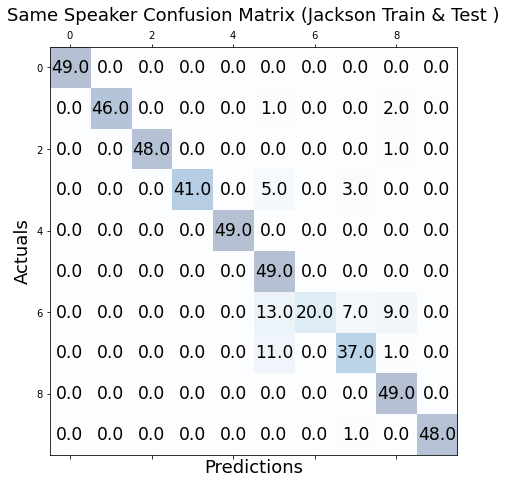

In [ ]:
true = jackson_test_df['labels'].astype('int')
pred = jackson_pred.astype('int')

correct = np.sum(pred == true)
accuracy = correct/len(true)

print("Same speaker Accuracy (Jackson) :", accuracy)

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Same Speaker Confusion Matrix (Jackson Train & Test )', fontsize=18)
plt.show()

Different speaker Accuracy (Jackson & Theo) : 0.42


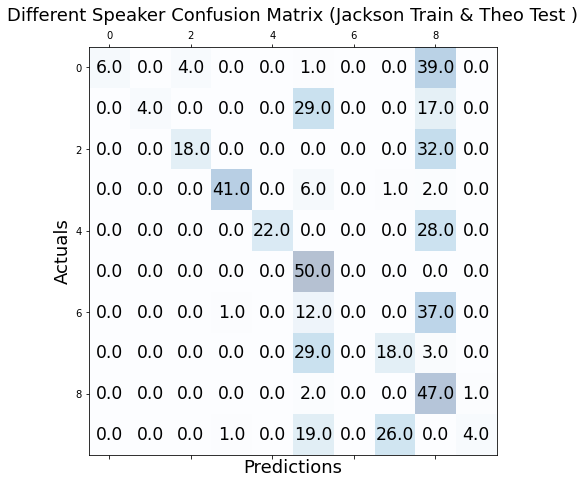

In [ ]:
true = theo_test_df['labels'].astype('int')
pred = theo_pred.astype('int')

correct = np.sum(pred == true)
accuracy = correct/len(true)

print("Different speaker Accuracy (Jackson & Theo) :", accuracy)

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Different Speaker Confusion Matrix (Jackson Train & Theo Test )', fontsize=18)
plt.show()

Different speaker Accuracy (Jackson & Nicolas) : 0.218


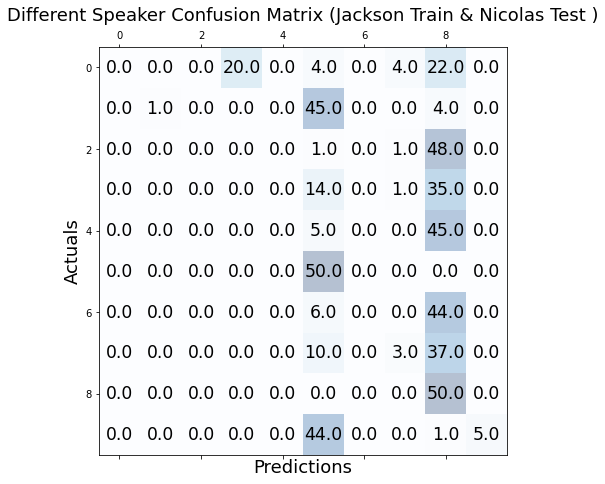

In [ ]:
true = nicolas_test_df['labels'].astype('int')
pred = nicolas_pred.astype('int')

correct = np.sum(pred == true)
accuracy = correct/len(true)

print("Different speaker Accuracy (Jackson & Nicolas) :", accuracy)

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Different Speaker Confusion Matrix (Jackson Train & Nicolas Test )', fontsize=18)
plt.show()

Different speaker Accuracy (Jackson & Yweweler) : 0.374


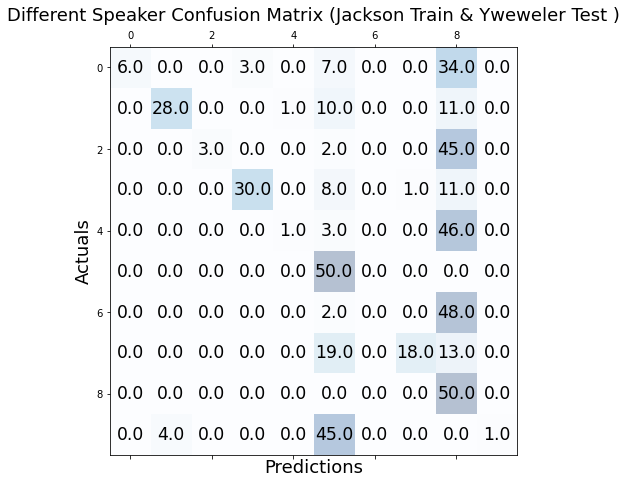

In [ ]:
true = yeweweler_test_df['labels'].astype('int')
pred = yeweweler_pred.astype('int')

correct = np.sum(pred == true)
accuracy = correct/len(true)

print("Different speaker Accuracy (Jackson & Yweweler) :", accuracy)

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Different Speaker Confusion Matrix (Jackson Train & Yweweler Test )', fontsize=18)
plt.show()

## Report on Improvements

Though DTW algorithm is good as a measure of non-linear similarity between two sequences from same speaker, we can observe that it fails to recognize isolated digit audio samples if speakers for train and test are different.

For improvements in terms of speed and computation, we can restrict our diagonal search space for distance matrices. This is done by introducing Itakura Matrix which will drastically reduce the search space and algorithm complexity.

Improvement in the performance can alse be brought by incoporating K-Nearest Neighbour algorithm where we fit :
1. DTW matrix [10x10] (containing distances between all pair of files in train folder)
2. And labels for each row of above matrix i.e Y [10x1]

Then take the new test samples and based on the K nearest neighbours, we do the prediction